In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from MERFISH_probe_design.probe_design import filters

In [2]:
# Randomly generate sequences
bases = ['A', 'T', 'C', 'G']

sequences = []
for i in range(10000):
    sequences.append(''.join(np.random.choice(bases, 30)))

In [3]:
# Wrap the sequences into a probe dictionary
probe_dict = {'g':{'t':pd.DataFrame({'target_sequence':sequences})}}
probe_dict['g']['t']

,target_sequence
0,GCGGACCGCGTATAGATCAAGGGGCACGAT
1,CCACGGTGGCATCGTCGGGATGCCTCATAA
2,CATGTTGTCACTTGTGTGTTATTAATGTCG
3,ATAATGATTACACCTCGTTCCCTGGGAACA
4,TCTGGGTCACCAAGCCTACTTCAACGTTAC
...,...
9995,ATGGGTGGCCGATCTATTAGCGTCGATCCA
9996,GGATTACCATGCAAGCACGTGATCACCGGG
9997,GCAGACATTTATGGGTTGTGGATGCTGGAT
9998,AAGACGAGCTGTTGAGGCATGTTCCAAAGT


In [4]:
# Calculate Tm by Jeff Moffitt's method
filters.calc_tm_JM_for_probe_dict(probe_dict, monovalentSalt=0.3, probe_conc=5e-9,
                              column_key_seq='target_sequence', column_key_write='target_Tm_JM')

In [5]:
# Calculate Tm by the biopython method  
filters.calc_tm_for_probe_dict(probe_dict, Na_conc=300, fmd_percentile=0, probe_conc=5,
                              column_key_seq='target_sequence', column_key_write='target_Tm_Bio')

In [6]:
# Calculate Tm by the new method and consider the formamide
filters.calc_tm_for_probe_dict(probe_dict, Na_conc=300, fmd_percentile=30, probe_conc=5,
                              column_key_seq='target_sequence', column_key_write='target_Tm_Bio_fmd')

In [7]:
# Calculate Tm by the new method and consider the formamide and actual concentrations of each probe
filters.calc_tm_for_probe_dict(probe_dict, Na_conc=300, fmd_percentile=30, probe_conc=0.05,
                              column_key_seq='target_sequence', column_key_write='target_Tm_Bio_fmd_conc')

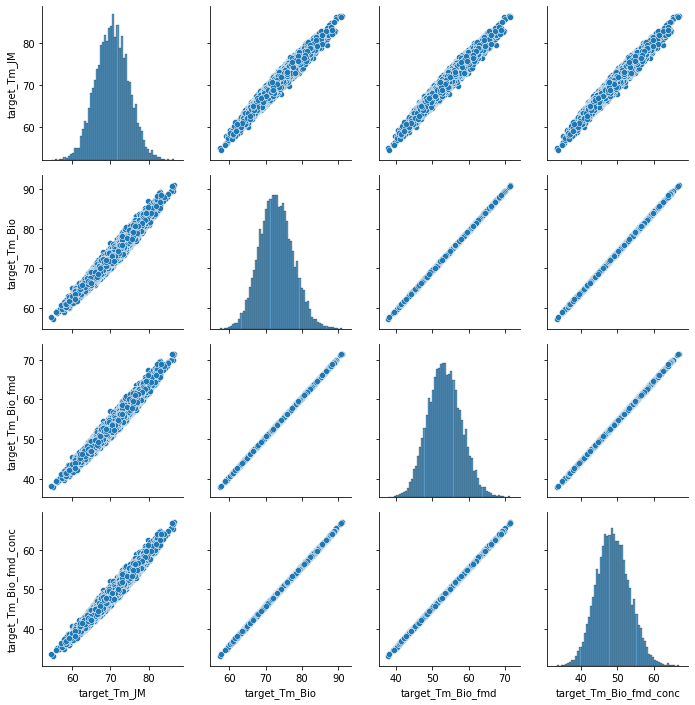

In [8]:
# Plot the correlations between different methods/paramters
g = sns.PairGrid(probe_dict['g']['t'])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


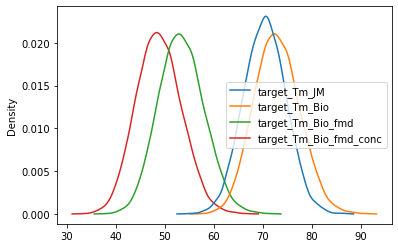

In [9]:
# Plot the distributions of Tms
sns.kdeplot(data=probe_dict['g']['t'])

In [10]:
# Print the means
print(f"target_Tm_JM: {np.mean(probe_dict['g']['t']['target_Tm_JM']):.2f} °C")
print(f"target_Tm_Bio: {np.mean(probe_dict['g']['t']['target_Tm_Bio']):.2f} °C")
print(f"target_Tm_Bio_fmd: {np.mean(probe_dict['g']['t']['target_Tm_Bio_fmd']):.2f} °C")
print(f"target_Tm_Bio_fmd_conc: {np.mean(probe_dict['g']['t']['target_Tm_Bio_fmd_conc']):.2f} °C")

target_Tm_JM: 70.42 °C
target_Tm_Bio: 72.89 °C
target_Tm_Bio_fmd: 53.39 °C
target_Tm_Bio_fmd_conc: 48.81 °C
